# DATASCIENCE CHALLENGE

Attached is the dataset with hourly energy load data for a period of 2 years and other climacteric variables.
1. Analyze variables, fill in missing values, normalize extreme values.
2. Analyse the correlation between variables by using three frequency of data:
Hourly, daily, weekly.
For daily/weekly frequency aggregate the data (for each variable using the sum or average values depending on the significance the aggregation has for the specifies variable. For ex. It makes sense the average temperature and not sum of temperature)
3. Obtain prediction models (for each frequency of observation: hourly, daily, weekly) . Feel free to use statistical and/or machine learning models, or ensemble models.
Compare different models (between the same frequency) and clearly state your final decision of the "best" model which can be used for prediction of energy load.

### 1. Analyze variables, fill in missing values, normalize extreme values.

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Import the database

energy_df = pd.read_csv("Energy _data.csv")
energy_df.head(5)

,Hour,energy_consumpt_2001,energy_consumpt_2002,full_temp_2001,full_humid_2001,full_temp_2002,full_humid_2002
0,1,631.623161,835.021567,-0.400000,64.000000,7.600000,82.000000
1,2,534.397104,711.875374,-0.733333,65.333333,7.733333,78.666667
2,3,453.538785,592.673215,-1.066667,66.666667,7.866667,75.333333
3,4,400.699718,526.997961,-1.400000,68.000000,8.000000,72.000000
4,5,378.171092,497.588642,-1.666667,60.333333,8.333333,69.666667


In [3]:
# Check for missing values

# function for checking 

def missing_values_table(df):
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

missing_values_table(energy_df)

There are 3 columns that have missing values.


,Missing Values,% of Total Values
energy_consumpt_2001,34,0.4
full_temp_2002,24,0.3
full_humid_2002,24,0.3


In [4]:
#hour column value is changed into date m-d H:M
date_col = pd.date_range("2001-01-01", periods=8784, freq="H")#.strftime('%m-%d %H:%M')
energy_df['date'] = date_col.values

In [5]:
# Checking missing values

missing_values_table(energy_df)

There are 3 columns that have missing values.


,Missing Values,% of Total Values
energy_consumpt_2001,34,0.4
full_temp_2002,24,0.3
full_humid_2002,24,0.3


In [6]:
# Analize variables

energy_df.describe()

,Hour,energy_consumpt_2001,energy_consumpt_2002,full_temp_2001,full_humid_2001,full_temp_2002,full_humid_2002
count,8784.000000,8750.000000,8784.000000,8784.000000,8784.00000,8760.000000,8760.000000
mean,4392.500000,488.754321,764.291985,17.602836,62.17270,18.197500,61.505023
std,2535.866716,167.554212,242.615520,8.031887,18.47477,7.713689,19.454944
min,1.000000,-614.175490,-1332.918388,-3.200000,3.00000,0.000000,4.000000
25%,2196.750000,372.264578,582.391359,11.800000,48.00000,12.066667,46.000000
50%,4392.500000,493.915280,786.779013,17.400000,65.00000,18.600000,64.000000
75%,6588.250000,571.766044,904.056715,23.600000,78.00000,24.200000,77.000000
max,8784.000000,6560.013773,9896.924643,41.000000,100.00000,36.400000,100.000000


In [7]:
# Check datatypes
energy_df.dtypes

Hour                             int64
energy_consumpt_2001           float64
energy_consumpt_2002           float64
full_temp_2001                 float64
full_humid_2001                float64
full_temp_2002                 float64
full_humid_2002                float64
date                    datetime64[ns]
dtype: object

In [8]:
# make distinction between years -2001
df_2001=energy_df[['Hour','energy_consumpt_2001','full_temp_2001','full_humid_2001']]
df_2001.head()


,Hour,energy_consumpt_2001,full_temp_2001,full_humid_2001
0,1,631.623161,-0.400000,64.000000
1,2,534.397104,-0.733333,65.333333
2,3,453.538785,-1.066667,66.666667
3,4,400.699718,-1.400000,68.000000
4,5,378.171092,-1.666667,60.333333


In [9]:
# make distinction between years -2002
df_2002=energy_df[['Hour','energy_consumpt_2002','full_temp_2002','full_humid_2002']]
df_2002.head()

,Hour,energy_consumpt_2002,full_temp_2002,full_humid_2002
0,1,835.021567,7.600000,82.000000
1,2,711.875374,7.733333,78.666667
2,3,592.673215,7.866667,75.333333
3,4,526.997961,8.000000,72.000000
4,5,497.588642,8.333333,69.666667


In [10]:
# Null values 2001
missing_values_table(df_2001)

There are 1 columns that have missing values.


,Missing Values,% of Total Values
energy_consumpt_2001,34,0.4


In [11]:
# Null values 2002
missing_values_table(df_2002)

There are 2 columns that have missing values.


,Missing Values,% of Total Values
full_temp_2002,24,0.3
full_humid_2002,24,0.3


In [12]:
# Fill NaN values

for index, value in df_2001['energy_consumpt_2001'].items():
    if np.isnan(value):
        df_2001['energy_consumpt_2001'].at[index] = df_2001['energy_consumpt_2001'].iloc[index-3: index].mean()

In [13]:
df_2001[df_2001['energy_consumpt_2001'].isnull()]

,Hour,energy_consumpt_2001,full_temp_2001,full_humid_2001


In [14]:
df_2001['energy_consumpt_2001'] = np.where(df_2001['Hour'] > 8760, np.nan, df_2001['energy_consumpt_2001'])
# df_2001[df_2001['energy_consumpt_2001'].isnull()]
df_2001.dropna(0,inplace=True)

C:\Users\David Aguilar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\David Aguilar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df_2002.dropna(0,inplace=True)

C:\Users\David Aguilar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

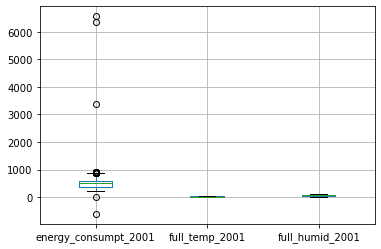

In [16]:
#Outliers 2001

df_2001.boxplot(column=['energy_consumpt_2001','full_temp_2001','full_humid_2001'])


<AxesSubplot:>

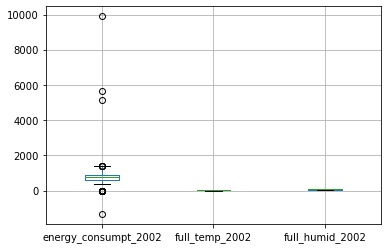

In [17]:
# Outliers 2002

df_2002.boxplot(column=['energy_consumpt_2002','full_temp_2002','full_humid_2002'])


<AxesSubplot:>

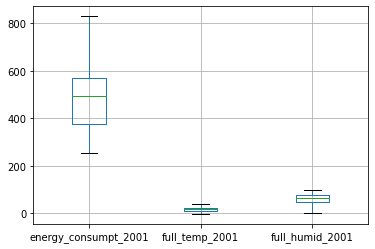

In [18]:
# 2001 removed outliers by using 0.01 and 0.99 percentiles

df_2001=df_2001[(df_2001['energy_consumpt_2001'] < np.percentile(df_2001['energy_consumpt_2001'],[99])[0]) & (df_2001['energy_consumpt_2001'] > np.percentile(df_2001['energy_consumpt_2001'],[1])[0]) ]
df_2001.boxplot(column=['energy_consumpt_2001','full_temp_2001','full_humid_2001'])


<AxesSubplot:>

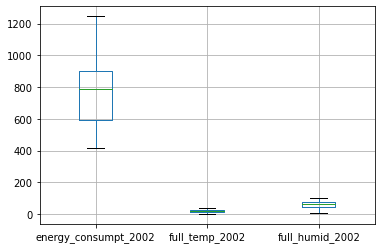

In [19]:
# 2002 removed outliers by using 0.01 and 0.99 percentiles

df_2002=df_2002[(df_2002['energy_consumpt_2002'] < np.percentile(df_2002['energy_consumpt_2002'],[99])[0]) & (df_2002['energy_consumpt_2002'] > np.percentile(df_2002['energy_consumpt_2002'],[1])[0]) ]
df_2002.boxplot(column=['energy_consumpt_2002','full_temp_2002','full_humid_2002'])


In [20]:
# Normalization 2001

minmax_normalized_2001_df = (df_2001-df_2001.min())/(df_2001.max()-df_2001.min())
minmax_normalized_2001_df = np.round(minmax_normalized_2001_df,decimals = 3)
minmax_normalized_2001_df

,Hour,energy_consumpt_2001,full_temp_2001,full_humid_2001
0,0.000,0.655,0.050,0.629
1,0.000,0.487,0.043,0.643
2,0.000,0.346,0.035,0.656
3,0.000,0.254,0.028,0.670
4,0.000,0.215,0.021,0.591
...,...,...,...,...
8749,0.999,0.917,0.205,0.271
8750,0.999,0.924,0.190,0.296
8751,0.999,0.965,0.174,0.320
8758,1.000,0.845,0.058,0.526


In [21]:
# Normalization 2002

minmax_normalized_2002_df = (df_2002-df_2002.min())/(df_2002.max()-df_2002.min())
minmax_normalized_2002_df = np.round(minmax_normalized_2002_df,decimals = 3)
minmax_normalized_2002_df

,Hour,energy_consumpt_2002,full_temp_2002,full_humid_2002
0,0.000,0.505,0.209,0.812
1,0.000,0.357,0.212,0.778
2,0.000,0.213,0.216,0.743
3,0.000,0.134,0.220,0.708
4,0.000,0.099,0.229,0.684
...,...,...,...,...
8751,0.999,0.983,0.286,0.333
8756,1.000,0.924,0.139,0.656
8757,1.000,0.766,0.115,0.708
8758,1.000,0.685,0.092,0.760


In [22]:
#hour column value is changed into date m-d H:M
date_col = pd.date_range("2001-01-01", periods=8584, freq="H")
df_2001['Hour'] = date_col.values
df_2001.rename(columns = {'Hour':'date'}, inplace = True)

In [23]:
#extract from date hour, day, week, groups data - 2001
hour_2001 = df_2001

hour_2001['hour'] = hour_2001.date.dt.hour
hour_2001['day'] = hour_2001.date.dt.day
hour_2001['week'] = hour_2001.date.dt.week
hour_2001["hour"] = hour_2001["date"].apply(lambda x: x.hour)
hour_2001["day"] = hour_2001["date"].apply(lambda x: x.day)
hour_2001["week"] = hour_2001["date"].apply(lambda x: x.week)

hour_2001.head(5)

C:\Users\David Aguilar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,date,energy_consumpt_2001,full_temp_2001,full_humid_2001,hour,day,week
0,2001-01-01 00:00:00,631.623161,-0.400000,64.000000,0,1,1
1,2001-01-01 01:00:00,534.397104,-0.733333,65.333333,1,1,1
2,2001-01-01 02:00:00,453.538785,-1.066667,66.666667,2,1,1
3,2001-01-01 03:00:00,400.699718,-1.400000,68.000000,3,1,1
4,2001-01-01 04:00:00,378.171092,-1.666667,60.333333,4,1,1


In [24]:
#calculates all metrics on a hour, day, week level
energy_hourly_2001 = hour_2001.groupby(['hour']).mean().drop(columns=['day' ,'week'])
energy_daily_2001 = hour_2001.groupby(['day' ]).mean().drop(columns=['hour','week'])
energy_weekly_2001 = hour_2001.groupby(['week']).mean().drop(columns=['hour','day'])

energy_daily_2001.describe()

,energy_consumpt_2001,full_temp_2001,full_humid_2001
count,31.000000,31.000000,31.000000
mean,485.389319,17.826815,62.221850
std,4.815735,0.773616,3.161998
min,473.515672,16.245602,56.303241
25%,481.904687,17.386516,59.841216
50%,485.096425,17.694907,62.040509
75%,489.561614,18.255093,64.420139
max,493.878547,20.441898,68.911111


In [25]:
#hour column value is changed into date m-d H:M
date_col = pd.date_range("2001-01-01", periods=8584, freq="H")
df_2002['Hour'] = date_col.values
df_2002.rename(columns = {'Hour':'date'}, inplace = True)

In [26]:
#extract from date hour, day, week, groups data - 2001
hour_2002 = df_2002

hour_2002['hour'] = hour_2002.date.dt.hour
hour_2002['day'] = hour_2002.date.dt.day
hour_2002['week'] = hour_2002.date.dt.week
hour_2002["hour"] = hour_2002["date"].apply(lambda x: x.hour)
hour_2002["day"] = hour_2002["date"].apply(lambda x: x.day)
hour_2002["week"] = hour_2002["date"].apply(lambda x: x.week)

hour_2002.head(5)

C:\Users\David Aguilar\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,date,energy_consumpt_2002,full_temp_2002,full_humid_2002,hour,day,week
0,2001-01-01 00:00:00,835.021567,7.600000,82.000000,0,1,1
1,2001-01-01 01:00:00,711.875374,7.733333,78.666667,1,1,1
2,2001-01-01 02:00:00,592.673215,7.866667,75.333333,2,1,1
3,2001-01-01 03:00:00,526.997961,8.000000,72.000000,3,1,1
4,2001-01-01 04:00:00,497.588642,8.333333,69.666667,4,1,1


In [27]:
#calculates all metrics on a hour, day, week level
energy_hourly_2002 = hour_2002.groupby(['hour']).mean().drop(columns=['day' ,'week'])
energy_daily_2002 = hour_2002.groupby(['day' ]).mean().drop(columns=['hour','week'])
energy_weekly_2002 = hour_2002.groupby(['week']).mean().drop(columns=['hour','day'])

energy_daily_2002.describe()

,energy_consumpt_2002,full_temp_2002,full_humid_2002
count,31.000000,31.000000,31.000000
mean,764.137236,18.360925,61.302811
std,11.031691,1.237512,2.501858
min,736.073690,16.121991,56.887626
25%,757.361924,17.577315,59.440394
50%,762.114750,18.452315,60.891414
75%,769.624391,19.104745,63.037300
max,784.460736,20.690783,65.900463


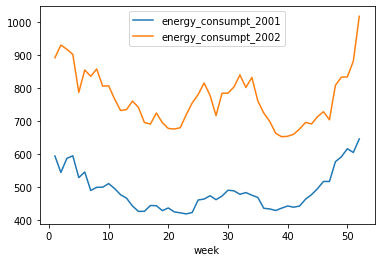

In [28]:
# plot energy 2001 vs 2002 daily

plot_2001_2002_energy = pd.concat([energy_weekly_2001["energy_consumpt_2001"],energy_weekly_2002["energy_consumpt_2002"]], axis=1, keys=["energy_consumpt_2001","energy_consumpt_2002"])
lines = plot_2001_2002_energy.plot.line()

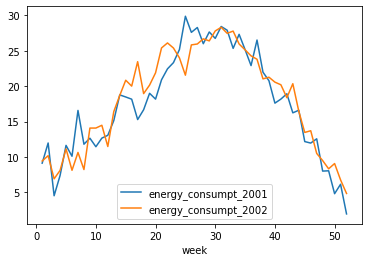

In [29]:
# plot temp 2001 vs 2002 daily

plot_2001_2002_temp = pd.concat([energy_weekly_2001["full_temp_2001"],energy_weekly_2002["full_temp_2002"]], axis=1, keys=["energy_consumpt_2001","energy_consumpt_2002"])
lines = plot_2001_2002_temp.plot.line()

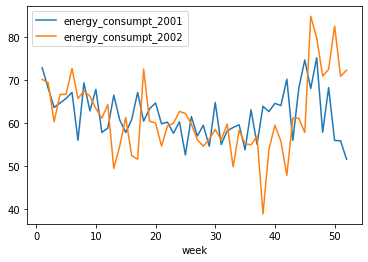

In [30]:
# plot humidity 2001 vs 2002 daily

plot_2001_2002_hum = pd.concat([energy_weekly_2001["full_humid_2001"],energy_weekly_2002["full_humid_2002"]], axis=1, keys=["energy_consumpt_2001","energy_consumpt_2002"])
lines = plot_2001_2002_hum.plot.line()

In [31]:
# create dfs for correlations
T1 = energy_hourly_2001[["full_temp_2001","energy_consumpt_2001"]]
T2 = energy_daily_2001[["full_temp_2001","energy_consumpt_2001"]]
T3 = energy_weekly_2001[["full_temp_2001","energy_consumpt_2001"]]
T4 = energy_hourly_2002[["full_temp_2002","energy_consumpt_2002"]]
T5 = energy_daily_2002[["full_temp_2002","energy_consumpt_2002"]]
T6 = energy_weekly_2002[["full_temp_2002","energy_consumpt_2002"]] 

H1 = energy_hourly_2001[["full_humid_2001","energy_consumpt_2001"]]
H2 = energy_daily_2001[["full_humid_2001","energy_consumpt_2001"]]
H3 = energy_weekly_2001[["full_humid_2001","energy_consumpt_2001"]]
H4 = energy_hourly_2002[["full_humid_2002","energy_consumpt_2002"]]
H5 = energy_daily_2002[["full_humid_2002","energy_consumpt_2002"]]
H6 = energy_weekly_2002[["full_humid_2002","energy_consumpt_2002"]] 


### Linear Regression Energy Consumption vs. Temperature

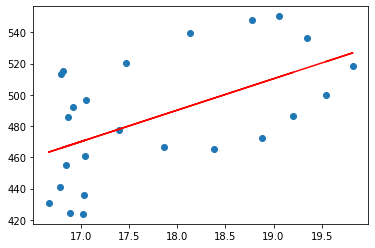

R^2 =  0.29611662864575766


In [32]:
#Hourly 2001

X = T1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = T1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_1 = T1["full_temp_2001"]
y_values_1 = T1["energy_consumpt_2001"]

correlation_matrix = np.corrcoef(x_values_1, y_values_1)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

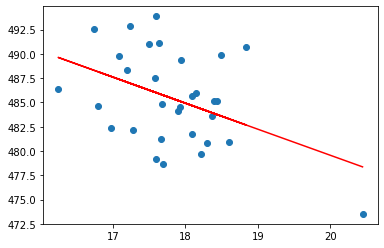

R^2 =  0.18625832693572011


In [33]:
#Daily 2001

X = T2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = T2.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_2 = T2["full_temp_2001"]
y_values_2 = T2["energy_consumpt_2001"]

correlation_matrix = np.corrcoef(x_values_2, y_values_2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

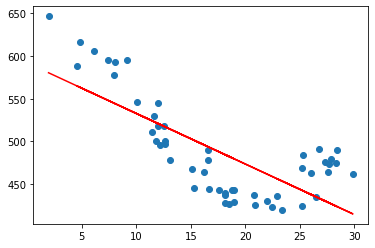

R^2 =  0.5481518775403316


In [34]:
#Weekly 2001

X = T3.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = T3.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_3 = T3["full_temp_2001"]
y_values_3 = T3["energy_consumpt_2001"]

correlation_matrix = np.corrcoef(x_values_3, y_values_3)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

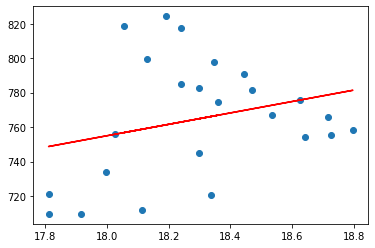

R^2 =  0.07377183941233308


In [35]:
#Hourly 2002

X = T4.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = T4.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_4 = T4["full_temp_2002"]
y_values_4 = T4["energy_consumpt_2002"]

correlation_matrix = np.corrcoef(x_values_4, y_values_4)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

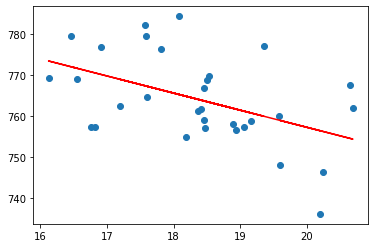

R^2 =  0.22063604307227852


In [36]:
#Daily 2002

X = T5.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = T5.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_5 = T5["full_temp_2002"]
y_values_5 = T5["energy_consumpt_2002"]

correlation_matrix = np.corrcoef(x_values_5, y_values_5)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

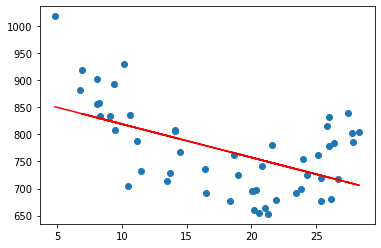

R^2 =  0.28573792493647215


In [37]:
#Weekly 2002

X = T6.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = T6.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_6 = T6["full_temp_2002"]
y_values_6 = T6["energy_consumpt_2002"]

correlation_matrix = np.corrcoef(x_values_6, y_values_6)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

### Linear Regression Energy Consumption vs. Humidity

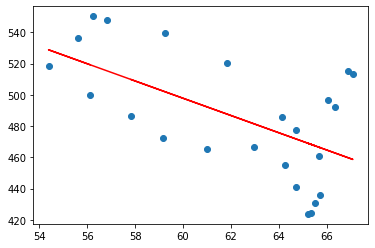

R^2 =  0.34189100646068443


In [38]:
#Hourly 2001

X = H1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = H1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_7 = H1["full_humid_2001"]
y_values_7 = H1["energy_consumpt_2001"]

correlation_matrix = np.corrcoef(x_values_7, y_values_7)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

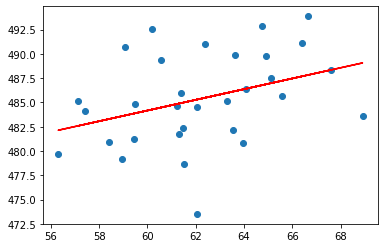

R^2 =  0.13045997003658147


In [39]:
#Daily 2001

X = H2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = H2.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_8 = H2["full_humid_2001"]
y_values_8 = H2["energy_consumpt_2001"]

correlation_matrix = np.corrcoef(x_values_8, y_values_8)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

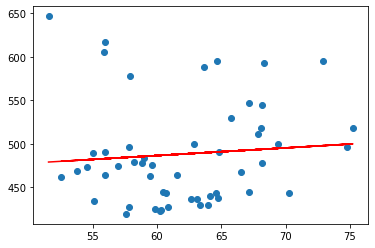

R^2 =  0.007135255648552538


In [40]:
#Weekly 2001

X = H3.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = H3.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_9 = H3["full_humid_2001"]
y_values_9 = H3["energy_consumpt_2001"]

correlation_matrix = np.corrcoef(x_values_9, y_values_9)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

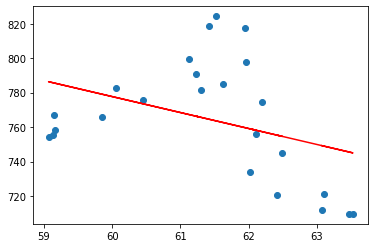

R^2 =  0.13816665832031447


In [41]:
#Hourly 2002

X = H4.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = H4.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_10 = H4["full_humid_2002"]
y_values_10 = H4["energy_consumpt_2002"]

correlation_matrix = np.corrcoef(x_values_10, y_values_10)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

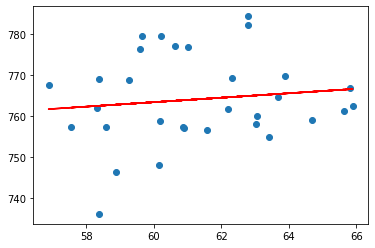

R^2 =  0.015302693265717086


In [42]:
#Daily 2002

X = H5.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = H5.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_11 = H5["full_humid_2002"]
y_values_11 = H5["energy_consumpt_2002"]

correlation_matrix = np.corrcoef(x_values_11, y_values_11)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

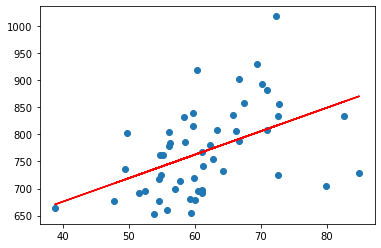

R^2 =  0.2168503533777266


In [43]:
#Weekly 2002

X = H6.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = H6.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

x_values_12 = H6["full_humid_2002"]
y_values_12 = H6["energy_consumpt_2002"]

correlation_matrix = np.corrcoef(x_values_12, y_values_12)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R^2 = ", r_squared)

### Polynomal Regression Energy Consumption vs. Temperature

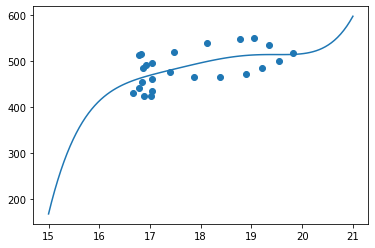

The correlation coefficient is:  0.30946126076266356


In [44]:
poly_1 = np.poly1d(np.polyfit(x_values_1, y_values_1, 5))

line_1 = np.linspace(15, 21, 100)

plt.scatter(x_values_1, y_values_1)
plt.plot(line_1, poly_1(line_1))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_1, poly_1(x_values_1)))

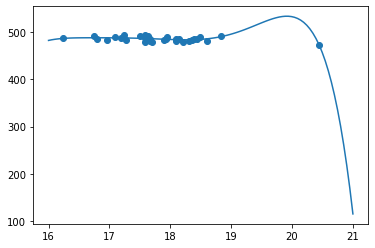

The correlation coefficient is:  0.3325079879291365


In [45]:
poly_2 = np.poly1d(np.polyfit(x_values_2, y_values_2, 6))

line_2 = np.linspace(16, 21, 100)

plt.scatter(x_values_2, y_values_2)
plt.plot(line_2, poly_2(line_2))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_2, poly_2(x_values_2)))

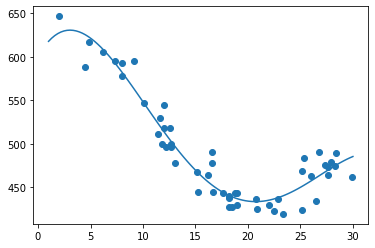

The correlation coefficient is:  0.9228718554021558


In [46]:
poly_3 = np.poly1d(np.polyfit(x_values_3, y_values_3, 4))

line_3 = np.linspace(1, 30, 100)

plt.scatter(x_values_3, y_values_3)
plt.plot(line_3, poly_3(line_3))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_3, poly_3(x_values_3)))

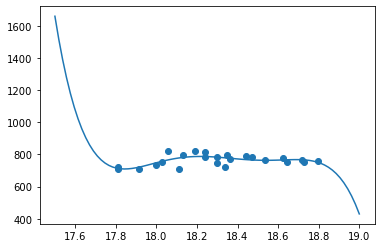

The correlation coefficient is:  0.39483735997714


In [47]:
poly_4 = np.poly1d(np.polyfit(x_values_4, y_values_4, 5))


line_4 = np.linspace(17.5, 19, 80)

plt.scatter(x_values_4, y_values_4)
plt.plot(line_4, poly_4(line_4))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_4, poly_4(x_values_4)))

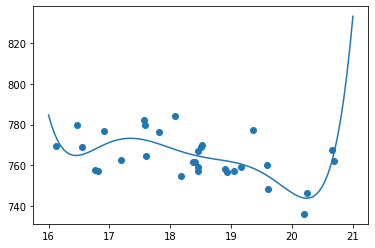

The correlation coefficient is:  0.43121085974759976


In [48]:
poly_5 = np.poly1d(np.polyfit(x_values_5, y_values_5, 6))



line_5 = np.linspace(16, 21, 100)



plt.scatter(x_values_5, y_values_5)
plt.plot(line_5, poly_5(line_5))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_5, poly_5(x_values_5)))

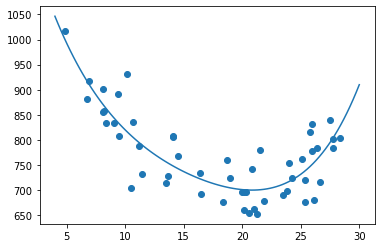

The correlation coefficient is:  0.7102835018141971


In [49]:
poly_6 = np.poly1d(np.polyfit(x_values_6, y_values_6, 4))

line_6 = np.linspace(4, 30, 100)

plt.scatter(x_values_6, y_values_6)
plt.plot(line_6, poly_6(line_6))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_6, poly_6(x_values_6)))

### Polynomal Regression Energy Consumption vs. Humidity

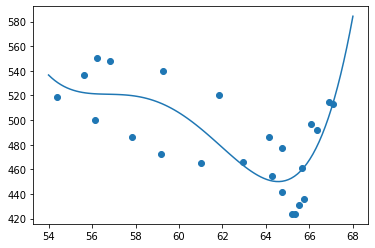

The correlation coefficient is:  0.5886825340233037


In [50]:
poly_7 = np.poly1d(np.polyfit(x_values_7, y_values_7, 4))
line_7 = np.linspace(54, 68, 100)
plt.scatter(x_values_7, y_values_7)
plt.plot(line_7, poly_7(line_7))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_7, poly_7(x_values_7)))


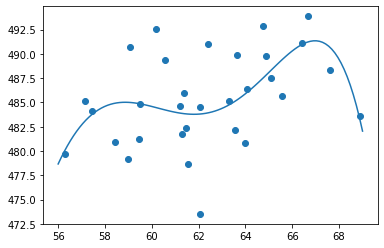

The correlation coefficient is:  0.2784022758567616


In [51]:
poly_8 = np.poly1d(np.polyfit(x_values_8, y_values_8, 5))
line_8 = np.linspace(56, 69, 100)
plt.scatter(x_values_8, y_values_8)
plt.plot(line_8, poly_8(line_8))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_8, poly_8(x_values_8)))


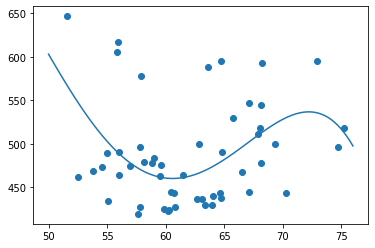

The correlation coefficient is:  0.1953603466154069


In [52]:
poly_9 = np.poly1d(np.polyfit(x_values_9, y_values_9, 4))
line_9 = np.linspace(50, 76, 100)
plt.scatter(x_values_9, y_values_9)
plt.plot(line_9, poly_9(line_9))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_9, poly_9(x_values_9)))


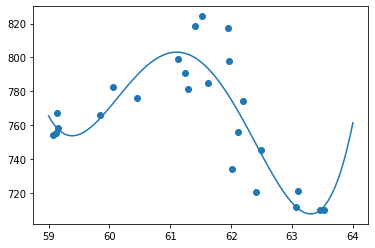

The correlation coefficient is:  0.7498539932521808


In [53]:
poly_10 = np.poly1d(np.polyfit(x_values_10, y_values_10, 4))
line_10 = np.linspace(59, 64, 100)
plt.scatter(x_values_10, y_values_10)
plt.plot(line_10, poly_10(line_10))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_10, poly_10(x_values_10)))

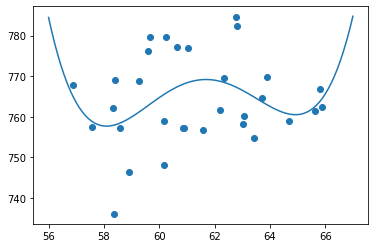

The correlation coefficient is:  0.10596934945346503


In [54]:
poly_11 = np.poly1d(np.polyfit(x_values_11, y_values_11, 4))
line_11 = np.linspace(56, 67, 100)
plt.scatter(x_values_11, y_values_11)
plt.plot(line_11, poly_11(line_11))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_11, poly_11(x_values_11)))

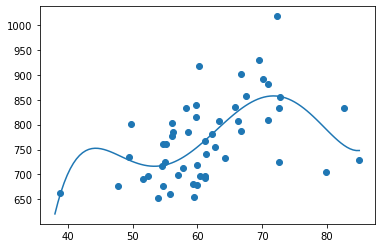

The correlation coefficient is:  0.39688815764159135


In [55]:
poly_12 = np.poly1d(np.polyfit(x_values_12, y_values_12, 5))
line_12 = np.linspace(38, 85, 100)
plt.scatter(x_values_12, y_values_12)
plt.plot(line_12, poly_12(line_12))
plt.show()
print("The correlation coefficient is: ", r2_score(y_values_12, poly_12(x_values_12)))

## Conclusion

After first inspection of data, we realized that it was best for the analysis to separate data between years and to remove the last 24 values since it exceeded the normal amount of hours for the year. We removed the outliers in 2001 by using a percentile range of 0.01 to 0.99. Furthermore, we created three new data frames for each year, representing the grouped data by hour, by day and by week. We compared individual variables between years. For example, Energy consumption in 2001 vs. 2002.

For the analysis we started with the most basic of tests which is a linear regression using the method of least squares. There were two regressions made> one that compare Energy Consumption with Temperature and the other one that compares Energy Consumption with Humidity. This test was carried out on the three level of groupings to analyze their correlation coefficient and see if there was a good prediction model. The results were the following:

- Energy Consumption vs. Temperature Hourly 2001: 0.29611662864575766
- Energy Consumption vs. Temperature Daily 2001: 0.18625832693572011
- Energy Consumption vs. Temperature Weekly 2001: 0.5481518775403316
- Energy Consumption vs. Temperature Hourly 2002: 0.07377183941233308
- Energy Consumption vs. Temperature Daily 2002: 0.22063604307227852
- Energy Consumption vs. Temperature Weekly 2002: 0.28573792493647215


- Energy Consumption vs. Humidity Hourly 2001: 0.34189100646068443
- Energy Consumption vs. Humidity Daily 2001: 0.13045997003658147
- Energy Consumption vs. Humidity Weekly 2001: 0.007135255648552538
- Energy Consumption vs. Humidity Hourly 2002: 0.13816665832031447
- Energy Consumption vs. Humidity Daily 2002: 0.015302693265717086
- Energy Consumption vs. Humidity Weekly 2002: 0.2168503533777266

The models did not present strong prediction capabilities so we decided to try polynomial regressions. The results for these test were the following.

- Energy Consumption vs. Temperature Hourly 2001: 0.30946126076266356
- Energy Consumption vs. Temperature Daily 2001: 0.3325079879291365
- Energy Consumption vs. Temperature Weekly 2001: 0.9228718554021558
- Energy Consumption vs. Temperature Hourly 2002: 0.39483735997714
- Energy Consumption vs. Temperature Daily 2002: 0.43121085974759976



- Energy Consumption vs. Humidity Hourly 2001: 0.5886825340233037
- Energy Consumption vs. Humidity Daily 2001: 0.2784022758567616
- Energy Consumption vs. Humidity Weekly 2001: 0.1953603466154069
- Energy Consumption vs. Humidity Hourly 2002: 0.7498539932521808
- Energy Consumption vs. Humidity Daily 2002: 0.10596934945346503
- Energy Consumption vs. Humidity Weekly 2002: 0.39688815764159135

Finally we can conclude that a polinomial regression of the 4th degree that compares Energy Consumption vs. Temperature is a good model for predicting values within this dataset. The highest coefficients were the following:

- Energy Consumption vs. Temperature Weekly 2001: 0.9228718554021558
- Energy Consumption vs. Temperature Weekly 2002: 0.7102835018141971
- Energy Consumption vs. Humidity Hourly 2002: 0.7498539932521808

Thus concluding that the best way to predict energy consumption for a year is to use a 4th degree polynomial regression for data grouped weekly.

### 3D Modelling of Weekly Summarized Dataframe for 2001

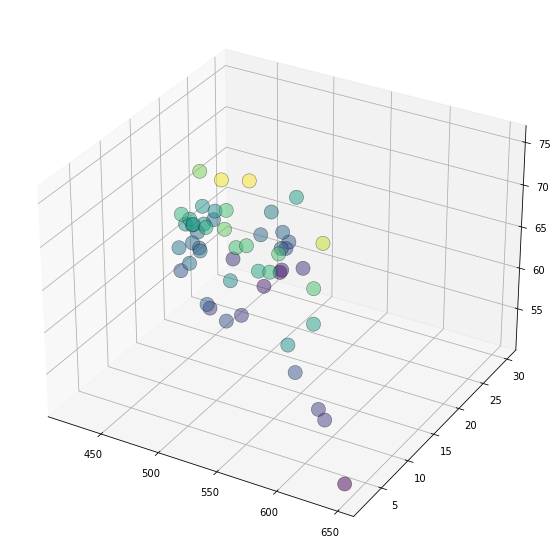

In [56]:


x = energy_weekly_2001["energy_consumpt_2001"]
y = energy_weekly_2001["full_temp_2001"]
z = energy_weekly_2001["full_humid_2001"]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=0.5, alpha=.5,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()